<a href="https://colab.research.google.com/github/socrisogo/bc_social_media_productivity/blob/main/Proyecto_TTECH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación

Este proyecto se enfoca en el análisis exploratorio, descriptivo y de negocio sobre el mercado laboral global en el área de inteligencia artificial y aprendizaje automático, utilizando un conjunto de datos que contiene ofertas de empleo en diferentes países. A través de un enfoque técnico dividido en varias fases (ingestión, limpieza, análisis descriptivo y análisis de negocio), se busca extraer conocimientos clave sobre salarios, demanda de habilidades, adopción del trabajo remoto y patrones geográficos.

# Justificación

Este proyecto se estructura en cuatro fases técnicas clave: ingestión de datos, preparación y limpieza, análisis descriptivo y análisis de negocio. A partir de un conjunto de datos  que simula más de 15.000 ofertas de empleo relacionadas con inteligencia artificial en más de 50 países, se trabajará en la carga eficiente de los datos, validación de su estructura y conversión de tipos. Posteriormente, se realizará la limpieza de valores nulos o inconsistentes, la normalización de variables como monedas, niveles de experiencia y categorías de trabajo, así como la transformación de fechas y estandarización de ubicaciones. En la etapa de análisis descriptivo se aplicarán técnicas estadísticas y visualizaciones para explorar distribuciones salariales, demanda de habilidades, modalidades de empleo y tendencias temporales. Finalmente, en el análisis de negocio se evaluarán variaciones salariales según tamaño de empresa, tipo de contrato, país y relación remota, además del impacto de las habilidades requeridas y la educación mínima. Este enfoque técnico permitirá generar conclusiones relevantes para modelos predictivos, inteligencia empresarial, planificación profesional y análisis de brechas laborales en el mercado global de IA para 2025.

# Preguntas de negocio

1. Compensación y salarios

1 ¿Qué países ofrecen los salarios promedio más altos en el área de IA? 

2 ¿Cómo varía el salario promedio según el nivel de experiencia (EN(Junior), MI(Intermediate), SE(Senior), EX(Director))?

3 ¿Cuál es la relación entre el tamaño de la empresa (S(Small), M(Medium), L(Large)) y el salario ofrecido?

4 ¿Qué categorías de trabajo (científico de datos, ingeniero de ML, etc.) tienen mayores salarios?

5 ¿Existe diferencia salarial significativa entre tipos de empleo (FT(Full time), PT(Part time), CT(Contract), FL(Freelance))?

6 ¿Cuál es la relación entre el porcentaje de trabajo remoto y el salario promedio?

7 ¿Qué industrias pagan más para roles de IA?

2. Análisis geográfico

8 ¿Qué países concentran la mayor cantidad de ofertas laborales en IA?

9 ¿Cómo se distribuyen los tipos de contratos por país?

10 ¿Cuál es la relación entre ubicación de la empresa y residencia del empleado?

11 ¿Dónde es más frecuente el trabajo remoto o híbrido?

12 ¿Qué países tienen mayor demanda de determinadas habilidades?


3. Tendencias y evolución del mercado

13 ¿Cómo ha evolucionado la oferta de empleo en IA a lo largo del tiempo?

14 ¿Que habilidades son mas demandadas?

15 ¿Se han incrementado las ofertas con modalidad remota?

16 ¿Cuáles son los picos de publicación de vacantes en el año?

17 ¿Se observan patrones en la duración entre la fecha de publicación y la fecha de aplicación?

# Ingestión de datos

In [8]:
# Abrir el archivo e importar la data
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
df=pd.read_csv("diversified_job_postings_version2.csv")

# Preparación y limpieza

In [9]:
#Mostramos un resumen de la información del DataFrame
# Esto incluye el número de entradas, el tipo de datos de cada columna y la cantidad de valores no nulos     
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [10]:
#Revisamos si hay valores nulos en el DataFrame
print(df.isnull().sum())

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


In [14]:
#Revisamos los valores únicos de las columnas relevantes
# Esto nos ayuda a entender la diversidad de datos en cada columna y detectar posibles inconsistencias  
print(df[['job_title',
'salary_currency',
'experience_level',
'employment_type',
'company_location',
'company_size',
'employee_residence',
'remote_ratio',
'education_required',
'industry']].nunique())

job_title             20
salary_currency        3
experience_level       4
employment_type        4
company_location      20
company_size           3
employee_residence    20
remote_ratio           3
education_required     4
industry              15
dtype: int64


In [ ]:
#Limpieza y transformación de datos

# 1. Eliminar columnas innecesarias
df= df.drop('job_description_length', axis=1, errors='ignore')

# 2. Convertir los valor4es de fecha a tipo datetime
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')
df['application_deadline'] = pd.to_datetime(df['application_deadline'], errors='coerce')

# 3. Convertir la columna de salario a numérico
df['salary_usd'] = pd.to_numeric(df['salary_usd'], errors='coerce')

# 4. Calculamos la duración del proceso de aplicación en dias
df['application_duration_days'] = (df['application_deadline'] - df['posting_date']).dt.days

# 5. Separar habilidades como lista
df['required_skills'] = df['required_skills'].fillna('').apply(
    lambda x: [s.strip() for s in x.split(',') if s.strip()]
)

# 6. Renombrar niveles de experiencia
experience_map = {
    "SE": "Expert",
    "MI": "Intermediate",
    "EN": "Junior",
    "EX": "Director"
}
df['experience_level'] = df['experience_level'].astype(str).str.strip().replace(experience_map).astype('category')

# 7. Renombrar tipo de empleo
employment_map = {
    "PT": "Part-time",
    "FT": "Full-time",
    "CT": "Contract",
    "FL": "Freelance"
}
df['employment_type'] = df['employment_type'].astype(str).str.strip().replace(employment_map).astype('category')

# 8. Renombrar tamaño de empresa
size_map = {
    "S": "Small",
    "M": "Medium",
    "L": "Large"
}
df['company_size'] = df['company_size'].astype(str).str.strip().replace(size_map).astype('category')

# 9. Clasificación para remote_ratio
remote_map = {
    0: 'No remote',
    50: 'Hybrid',
    100: 'Fully remote'
}
df['remote_ratio'] = df['remote_ratio'].replace(remote_map).astype('category')

# 10. Categóricos iniciales
cat_cols = ['job_title', 'experience_level', 'employment_type', 'company_location',
            'company_size', 'employee_residence', 'remote_ratio', 'education_required', 'industry']
df[cat_cols] = df[cat_cols].astype('category')


print(df.head())

# Analítica descriptiva

In [ ]:
#Se realiza la estadistica descriptiva de los datos
print(df.describe())

salary_usd:
  Media: 82622.07
  Mediana: 56243.00
  Moda: 34356.00

years_experience:
  Media: 6.25
  Mediana: 5.00
  Moda: 0.00

job_description_length:
  Media: 1503.31
  Mediana: 1512.00
  Moda: 1519.00

benefits_score:
  Media: 6.47
  Mediana: 6.50
  Moda: 10.00



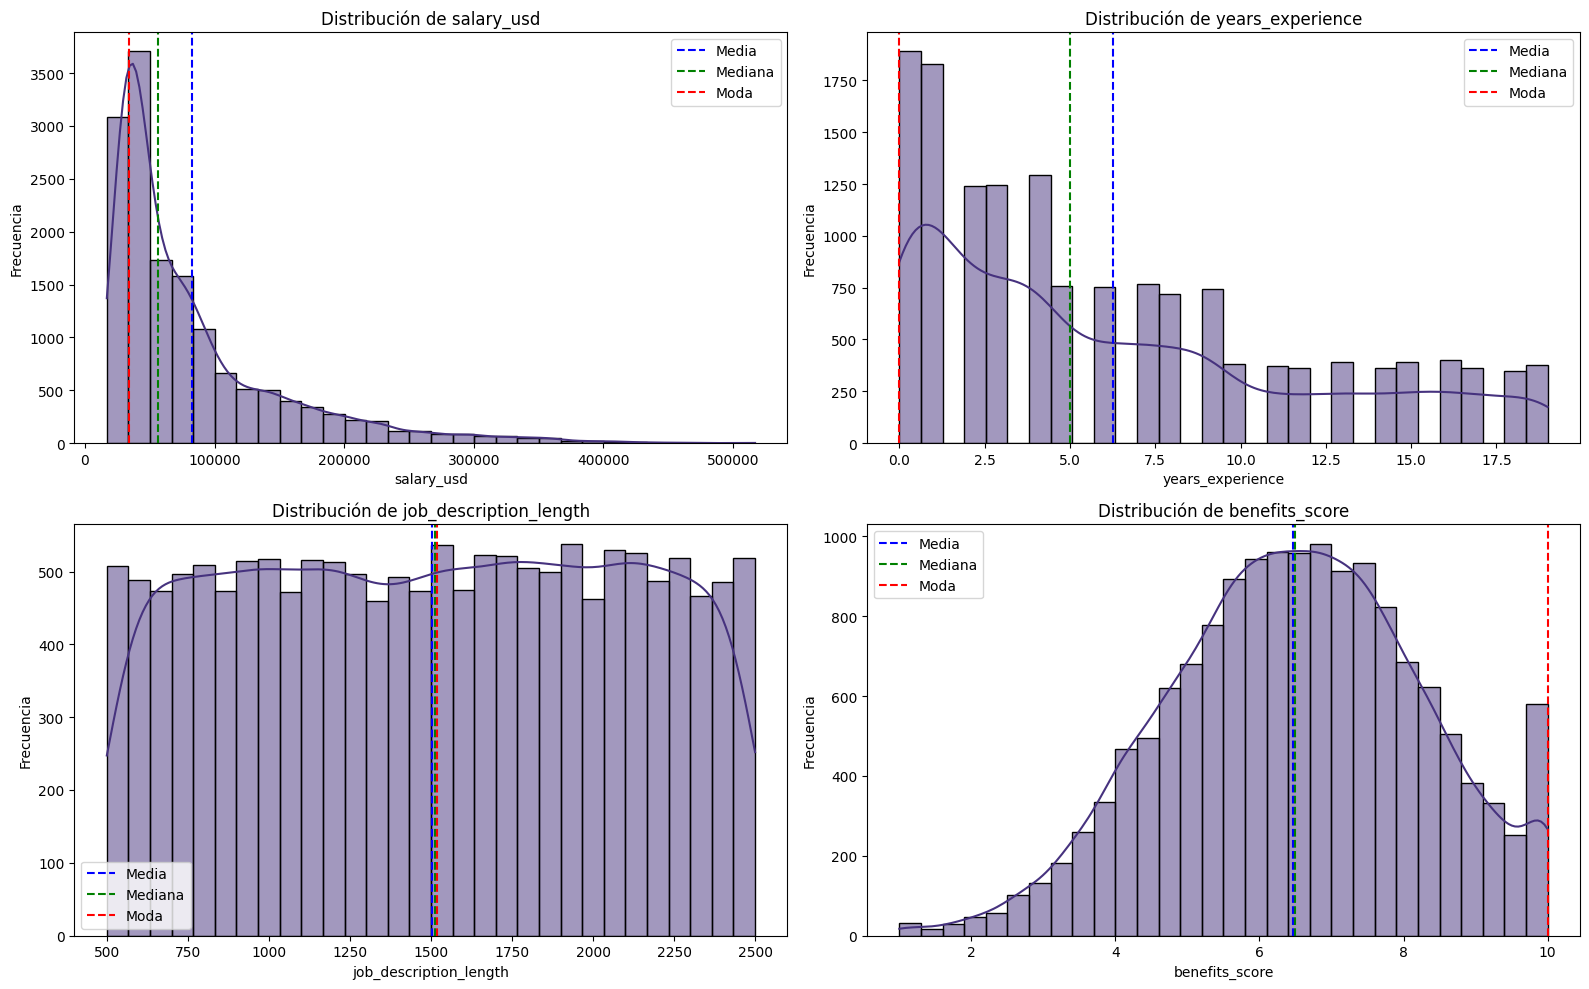

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Selección de columnas
numeric_cols = ['salary_usd', 'years_experience', 'job_description_length', 'benefits_score']

# Eliminar nulos
df_clean = df[numeric_cols].dropna()

# Calcular estadísticas
desc_stats = {}
for col in numeric_cols:
    desc_stats[col] = {
        'media': df_clean[col].mean(),
        'mediana': df_clean[col].median(),
        'moda': df_clean[col].mode()[0]
    }

# Imprimir estadísticas
for col, stats_dict in desc_stats.items():
    print(f"{col}:")
    print(f"  Media: {stats_dict['media']:.2f}")
    print(f"  Mediana: {stats_dict['mediana']:.2f}")
    print(f"  Moda: {stats_dict['moda']:.2f}\n")

# Visualizar distribuciones
sns.set_palette("viridis")
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.axvline(desc_stats[col]['media'], color='blue', linestyle='--', label='Media')
    plt.axvline(desc_stats[col]['mediana'], color='green', linestyle='--', label='Mediana')
    plt.axvline(desc_stats[col]['moda'], color='red', linestyle='--', label='Moda')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend()
plt.tight_layout()
plt.show()


In [33]:
# 1. ¿Qué ha pasado? (Resumen general)
total_ofertas = len(df)
salario_promedio = df['salary_usd'].mean()
salario_mediana = df['salary_usd'].median()
salario_min = df['salary_usd'].min()
salario_max = df['salary_usd'].max()
q1 = df['salary_usd'].quantile(0.25)
q3 = df['salary_usd'].quantile(0.75)

print(f"Total de ofertas analizadas: {total_ofertas}")
print(f"El salario promedio es ${salario_promedio:,.0f} USD.")
print(f"El salario mediano es ${salario_mediana:,.0f} USD.")
print(f"El salario más bajo registrado es ${salario_min:,.0f} USD.")
print(f"El salario más alto registrado es ${salario_max:,.0f} USD.")
print(f"El 25% de los empleados gana menos de ${q1:,.0f} USD.")
print(f"El 25% superior gana más de ${q3:,.0f} USD.")

# 2. ¿Cómo se distribuyen los datos?
rango_concentrado = (q1, q3)
print(f"Los sueldos están más concentrados entre ${rango_concentrado[0]:,.0f} y ${rango_concentrado[1]:,.0f} USD.")

# 3. ¿Cuáles son los valores más comunes, extremos o atípicos?
moda_salario = df['salary_usd'].mode()[0]
print(f"El salario más común es ${moda_salario:,.0f} USD.")

# 4. Sector que mejor paga
sector_mejor_paga = df.groupby('industry')['salary_usd'].mean().sort_values(ascending=False).index[0]
salario_sector_top = df.groupby('industry')['salary_usd'].mean().max()
print(f"El sector que mejor paga es \"{sector_mejor_paga}\" con un salario promedio de ${salario_sector_top:,.0f} USD.")

# 5. Identificación de valores extremos (outliers)
outliers = df[df['salary_usd'] > salario_max * 0.95]
print(f"Cantidad de salarios extremadamente altos (top 5%): {len(outliers)}")

Total de ofertas analizadas: 15000
El salario promedio es $82,622 USD.
El salario mediano es $56,243 USD.
El salario más bajo registrado es $16,869 USD.
El salario más alto registrado es $517,110 USD.
El 25% de los empleados gana menos de $35,768 USD.
El 25% superior gana más de $101,240 USD.
Los sueldos están más concentrados entre $35,768 y $101,240 USD.
El salario más común es $34,356 USD.
El sector que mejor paga es "Media" con un salario promedio de $85,137 USD.
Cantidad de salarios extremadamente altos (top 5%): 2


# Análisis de negocio

Pregunta 1: Países con mejores salarios

In [ ]:
# --- Pregunta 1: Países con mejores salarios ---

# Agrupamos por ubicacion de compañia y calculamos el salario promedio
# Luego ordenamos de mayor a menor y seleccionamos los 15 primeros
top_salaries_by_country = (
    df.groupby('company_location')['salary_usd']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

fig = px.bar(
    top_salaries_by_country,
    x='company_location',
    y='salary_usd',
    title='Top 10 Ubicación de compañias con salarios promedio más altos de empleos IA',
    labels={'company_location': 'Compañias x País', 'salary_usd': 'Salario Promedio (USD)'},
    text='salary_usd',
    color='company_location',
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45, showlegend=False)

fig.show()

Pregunta 2: Salario promedio según nivel de experiencia 

# --- Pregunta 2: Salario promedio según nivel de experiencia ---


# Agrupar salario promedio por nivel de experiencia
salary_by_experience = (
    df.groupby('experience_level')['salary_usd']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Crear gráfico de barras con Plotly
fig = px.bar(
    salary_by_experience,
    x='experience_level',
    y='salary_usd',
    title='Salario promedio según nivel de experiencia',
    labels={'experience_level': 'Nivel de experiencia','salary_usd': 'Salario Promedio (USD)'},
    text='salary_usd',
    color='experience_level',
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45, showlegend=False)

# Mostrar gráfico
fig.show()

Pregunta 3: Salario promedio por tamaño de empresa


In [ ]:
# --- Pregunta 3: Salario promedio por tamaño de empresa ---

# Agrupar salario promedio por tamaño de empresa
salary_by_company_size = (
    df.groupby('company_size')['salary_usd']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Crear gráfico
fig_size = px.bar(
    salary_by_company_size,
    x='company_size',
    y='salary_usd',
    title='Salario promedio según tamaño de empresa',
    labels={'company_size': 'Tamaño de la empresa','salary_usd': 'Salario Promedio (USD)'},
    text='salary_usd',
    color='company_size',
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig_size.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_size.update_layout(xaxis={'categoryorder': 'total descending'},xaxis_tickangle=-45, showlegend=False)

# Mostrar gráfico
fig_size.show()


Pregunta 4: Top 15 categorías de trabajo con mayores salarios

In [ ]:
# --- Pregunta 4: Top 15 categorías de trabajo con mayores salarios ---

# Agrupar por título del trabajo y calcular salario promedio
top_roles_by_salary = (
    df.groupby('job_title')['salary_usd']
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

# Gráfico con tonos cálidos
fig_roles = px.bar(
    top_roles_by_salary,
    x='salary_usd',
    y='job_title',
    orientation='h',
    title='Top 15 Trabajos con mayores salarios en IA',
    labels={'job_title': 'Categoría de trabajo', 'salary_usd': 'Salario Promedio (USD)'},
    text='salary_usd',
    color='salary_usd',  # Usamos el valor de salario como referencia de color
    color_continuous_scale=px.colors.sequential.Viridis
)
fig_roles.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_roles.update_layout(yaxis={'categoryorder': 'total ascending'}, coloraxis_showscale=True)

fig_roles.show()


Pregunta 5: Salario promedio según tipo de empleo

In [ ]:
# --- Pregunta 5: Salario promedio según tipo de empleo ---

# Agrupar por tipo de empleo y calcular salario promedio
salary_by_employment = (
    df.groupby('employment_type')['salary_usd']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Gráfico de barras con escala Viridis
fig_employment = px.bar(
    salary_by_employment,
    x='employment_type',
    y='salary_usd',
    title='Salario promedio según tipo de empleo',
    labels={'employment_type': 'Tipo de empleo', 'salary_usd': 'Salario Promedio (USD)'},
    text='salary_usd',
    color='employment_type',
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig_employment.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_employment.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45, showlegend=False)

fig_employment.show()

Pregunta 6: Salario promedio según porcentaje de trabajo remoto

In [ ]:
# --- Pregunta 6: Salario promedio según porcentaje de trabajo remoto ---

# Agrupar salario promedio por porcentaje de trabajo remoto (0, 50, 100)
salary_by_remote = (
    df.groupby('remote_ratio')['salary_usd']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Gráfico de barras
fig_remote = px.bar(
    salary_by_remote,
    x='remote_ratio',
    y='salary_usd',
    title='Salario promedio según porcentaje de trabajo remoto',
    labels={'remote_ratio': 'Porcentaje de trabajo remoto (%)', 'salary_usd': 'Salario Promedio (USD)'},
    text='salary_usd',
    color='remote_ratio',
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig_remote.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_remote.update_layout(xaxis={'categoryorder': 'category descending'}, xaxis_tickangle=-45, showlegend=False)

fig_remote.show()

Pregunta 7: Top 15 industrias con mayores salarios

In [ ]:
# --- Pregunta 7: Top 15 industrias con mayores salarios ---

# Agrupar por industria y calcular salario promedio (top 15)
salary_by_industry = (
    df.groupby('industry')['salary_usd']
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

# Gráfico horizontal
fig_industry = px.bar(
    salary_by_industry,
    x='salary_usd',
    y='industry',
    orientation='h',
    title='Top 15 Sectores de la industria con mayores salarios en IA',
    labels={
        'industry': 'Sectores de la Industria',
        'salary_usd': 'Salario Promedio (USD)'
    },
    text='salary_usd',
    color='salary_usd',
    color_continuous_scale=px.colors.sequential.Viridis
)
fig_industry.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_industry.update_layout(yaxis={'categoryorder': 'total ascending'},  coloraxis_showscale=True)

fig_industry.show()


Pregunta 8: Top 15 países con mayor cantidad de ofertas laborales 

In [ ]:
# --- Pregunta 8: Top 15 países con mayor cantidad de ofertas laborales ---

# Agrupar por país de empresa y contar
offers_by_country = (
    df['company_location']
    .value_counts()
    .head(10)
    .reset_index()
)
offers_by_country.columns = ['company_location', 'Cantidad']  # asignación de nombres a las columnas

# Gráfico
fig_country = px.bar(
    offers_by_country,
    x='company_location',
    y='Cantidad',
    title='Top 10 Ubicación de compañias con mayor cantidad de ofertas laborales en IA',
    labels={'company_location': 'Compañias x País','Cantidad': 'Cantidad de ofertas'},
    text='Cantidad',
    color='company_location',
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig_country.update_traces(texttemplate='%{text}', textposition='outside')
fig_country.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45, showlegend=False)

fig_country.show()

Pregunta 9: Distribución de tipos de contrato por país

Pregunta 10: Relación entre ubicación de la empresa y residencia del empleado 

Pregunta 11: Distribución del trabajo remoto o híbrido por país

Pregunta 12: Top habilidades más demandadas por país